# Logistic Regression from Scratch over MNIST Dataset (Multi-Class Classification)
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). It is a Discriminate Learning Algorithm which means that it try to find posterior probability over classes directly without the envolvement of likelihood probabilities.<br>

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, True/False or healthy/sick. <br>

This can be extended to Classify several classes of events such as determining whether an image contains a cat, dog, lion, etc.<br>

This code contains only about how we can fit a logistic model over user given dataset and also to get a good output result out of it. The code written keeping vision of object oriented programing which means that the code is fully moduler so that to keep in mind about the use of the functions in other programs also.
<br>
### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Calling Data
Data is call for fitting of object classifer created here. The Columns are selected here is according to the DIGIT RECOGNISATION DATASET from Famous MNIST DATASET Easily find on Kaggle(https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv).

In [2]:
training_data = pd.read_csv("mnist_train.csv")
testing_data = pd.read_csv("mnist_test.csv")

### Preprocessing of training and testing data

Separating and One Hot Encoding the labels from data

In [3]:
training_labels = training_data['label']
testing_labels = testing_data['label']
C = np.eye(10,10)[training_labels]

In [4]:
training_data.drop(['label'],axis=1,inplace=True)
training_data = np.array(training_data)
testing_data.drop(labels=['label'],axis=1,inplace=True)
testing_data = np.array(testing_data)

### Softmax Function
Defining the Softmax Function. Softmax function is use in the ml to get the probability value (i.e. between 0 to 1) for any feature. The function basically has the formula which make the value equal to probable value of the feature between 0 to 1.<br>
 Funtion to return Posterior Probabilities
### Formula : 
$$S_ \theta (x,c) =  \frac{e^{-{( \theta^{0Tx} + \theta_0)}}}{\sum_{i=0}^{n}e^{-{( \theta^{i Tx} + \theta_0^i)}}}$$

In [5]:
def softmax_probabilities(t0s,ts,X):
    
    #print(X.shape,"\n",ts.shape,"\n",t0s.shape)
    
    likelihood_probabilities = np.exp(np.matmul(X,ts) + t0s)
    
    #print(likelihood_probabilities.shape)
    
    normalizing_probabilities = np.sum(likelihood_probabilities,axis=1)
    
    normalizing_probabilities = normalizing_probabilities.reshape(normalizing_probabilities.shape[0],1)
    
    #print(normalizing_probabilities.shape)
    
    posterior_probabilities = (likelihood_probabilities/normalizing_probabilities)
    
    return posterior_probabilities

### Derivative Functions
Derivative functions are define to find the derivative of the features to train the model and get the weights for the GDA<br>
Funtions to return derivatives with respect to wieghts for GDA
### Formula : del by del0s
$$\frac{\partial }{\partial \theta_ \mathrm{0}}\mathbf{S_i(\theta,C)}$$
### Formula : del by dels
$$\frac{\partial }{\partial \theta}\mathbf{S_i(\theta,C)}$$

In [6]:
def delbydel0s(S,C):
    
    return np.sum((S-C),axis=0)/C.shape[0]

In [7]:
def delbydels(S,C,X):
    
    return np.matmul(X.T,(S-C))/C.shape[0]

### Cross Entropy Function 
Defining Function for Cross Entroy Loss calculation.In Convex Optimization we find the global minima to train the model so it get less error while prediction for the testing and training data. This error is called  as loss. We introduce log and a negative sign in case to smoothing of and inverting the parabola to find the global minima.<br>
##### Here, Logrithm is use to smoothing out the curve so that it don't stucked in any local minima. 
##### Here, Negative sign is introduce to invert the parabola of the function.
### Formula : 
$$L_ \theta (S,C) = -\log \left( \frac{\sum_{i=0}^{n}C^i * S_i(\theta,X)}{One Hot Encode Length(C)}\right)$$

In [8]:
def cross_entropy_loss_with_logits(S,C):
    
    return -np.sum((np.log(S)*C))/C.shape[0]

### Gradient Descent
The Fit function is to fit the learning curve and reduce the loss of the model. The algorithm use here is the Stocastic Gradient Descent(SGD). The algorithm is containing the learning rate,epsilon for the stoping of under going algorithm to find global minima.

In [9]:
def fit(training_data=training_data,epsilon=10**(-4),alpha=10**(-5),one_hot_encode=C):
    no_of_labels = one_hot_encode.shape[1]
    no_of_columns = training_data.shape[1]
    
    iterations = []
    neg_log_loss_history = []

    t0s_initial = np.zeros((1,no_of_labels))
    ts_initial = np.zeros((no_of_columns,no_of_labels))

    i = 0
    print("Starting the training over your given data")
    while(True):
    
        logits_initial = softmax_probabilities(t0s_initial,ts_initial,training_data)



        t0s_final = t0s_initial - (alpha * delbydel0s(logits_initial,one_hot_encode))

        ts_final = ts_initial - (alpha * delbydels(logits_initial,one_hot_encode,training_data))



        logits_final = softmax_probabilities(t0s_final,ts_final,training_data)

        if abs(cross_entropy_loss_with_logits(logits_initial,one_hot_encode)-cross_entropy_loss_with_logits(logits_final,one_hot_encode)) < epsilon:

            break 


        iterations.append(i)

        neg_log_loss_history.append(cross_entropy_loss_with_logits(logits_initial,one_hot_encode))

        t0s_initial = t0s_final

        ts_initial = ts_final
        
        print('Iteration=',i,'\nLog Loss Value=',neg_log_loss_history[i])
        
        clear_output(wait=True)

        i += 1
    print('Iteration=',iterations[-1],'\nLog Loss Value=',neg_log_loss_history[-1])
    print("\nThe training is done and waits are save.....\nYou can use the weights.....\nEnjoy")
    plt.xlabel('Iterations')
    plt.ylabel('Cross Entropy Loss')
    plt.title('Training Loss Curve')
    plt.plot(iterations,neg_log_loss_history)
    return t0s_final,ts_final

### Prediction Function
Prediction function is use to get the accuracy of the fitted model over training and testing data so that we can get to know how much accurate over model is trained over training data to predict right output.

In [10]:
def accuracy_prediction(t0s,ts,testing_data=testing_data,testing_labels=testing_labels):
    
    testing_data = np.array(testing_data)
    
    probability_test = softmax_probabilities(t0s,ts,testing_data)
    
    predicted_classes_test = np.argmax(probability_test,axis=1)
    
    equal_classes = np.equal(predicted_classes_test,testing_labels)
    
    accuracy = (np.count_nonzero(equal_classes)/testing_data.shape[0])*100
    
    return accuracy

### Fitting model over Training Data

Iteration= 355 
Log Loss Value= 0.31464701804270195

The training is done and waits are save.....
You can use the weights.....
Enjoy


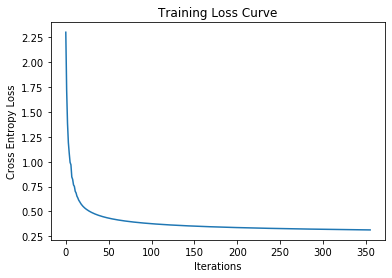

In [11]:
theta0s,thetas = fit(training_data=training_data)

### Predicting result on both the datasets

#### Training Accuracy

In [12]:
accuracy_train = accuracy_prediction(theta0s,thetas,training_data,training_labels)
print('Accuracy on training data =',accuracy_train)

Accuracy on training data = 91.25666666666666


#### Testing Accuracy

In [13]:
accuracy_test = accuracy_prediction(theta0s,thetas,testing_data,testing_labels)
print('Accuracy on testing data =',accuracy_test)

Accuracy on testing data = 91.61
